In [14]:
import cv2
import matplotlib.pyplot as plt 

In [15]:
img = cv2.imread('HULK.jpeg')
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
## pillow 
from PIL import Image
img1=Image.open("HULK.jpeg")
img1.show()
print(img.shape)
print(img1.size)
print(img.dtype)


(277, 182, 3)
(182, 277)
uint8


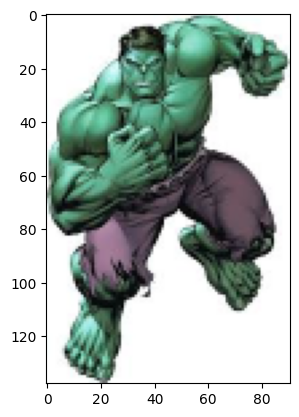

In [17]:
scaled_image=cv2.resize(img, (1200, 200))
scaled_image=cv2.resize(img,(0,0),fx=0.5,fy=0.5)
plt.imshow(scaled_image)

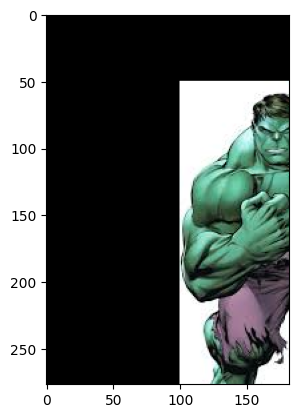

In [18]:
##translation -- changes the location of the image on the screen
import numpy as np
rows, cols = img.shape[:2]
tx, ty = 100, 50  #translation factor
M = np.float32([[1, 0, tx], [0, 1, ty]])
# [1,0,tx]
##1 -- keep the x coordinate unchanged
##0 -- no change in y coordinate
##tx -- translation factor for x coordinate

translated_image = cv2.warpAffine(img, M, (cols, rows))
plt.imshow(translated_image)


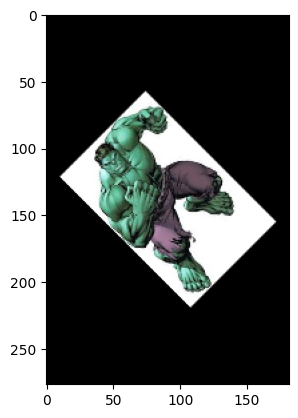

In [19]:
##rotation
center = (cols//2,rows//2)  #center of the image
angle = 45  #angle of rotation
scale = 0.5  #scaling factor -- zoom in or zoom out
# 1 -- original image 
N = cv2.getRotationMatrix2D(center, angle, scale)

rotated_image = cv2.warpAffine(img,N,(cols, rows))
plt.imshow(rotated_image)


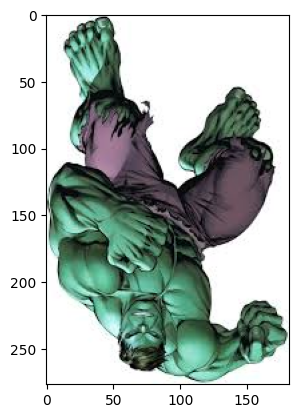

In [20]:
##flipping
flip_image = cv2.flip(img,0)  
 # 0 -- flip vertically, 1 -- flip horizontally, -1 -- flip both vertically and horizontally
plt.imshow(flip_image)

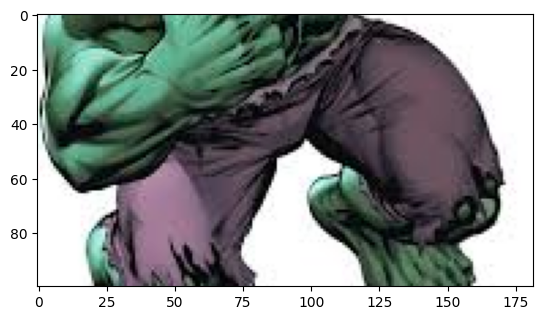

In [21]:
##cropping -- slicing an array
cropped_image = img[100:200,:]
plt.imshow(cropped_image)


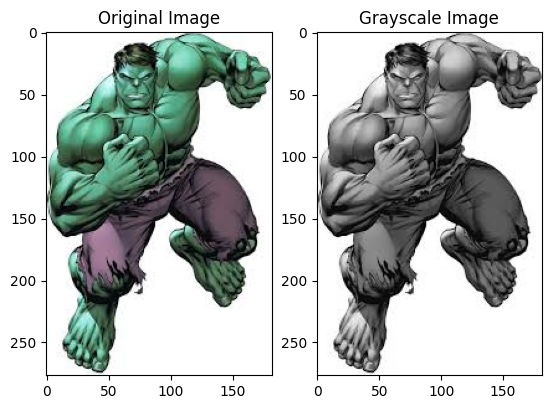

In [22]:
img2 = cv2.imread("HULK.jpeg")
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

plt.subplot(1,2,1)
plt.imshow(img2)
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.show()

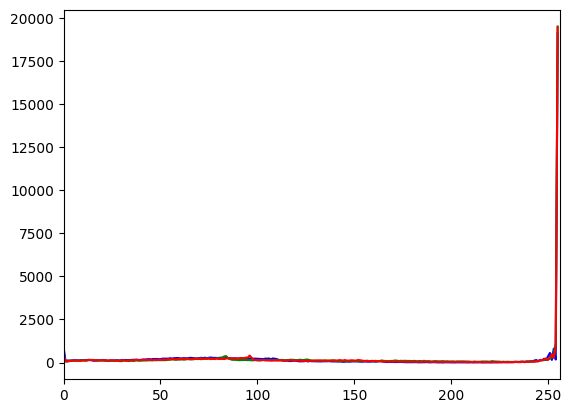

In [23]:
##histogram -- distribution of pixel intensity value

color = ("b","g","r")  #blue, green, red
for i, col in enumerate(color):
    #plt.subplot(1, 3, i+1)
    ##i = channel index values 0, 1, 2
    #none = mask -- we are computing the histogram at the entire image
    
    hist = cv2.calcHist([img2], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])
plt.show()


In [24]:
##erosion -- remove white pixels from the boundary of an object
## digestion -- opp of erosion

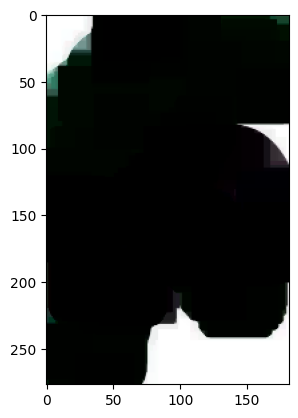

In [25]:
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations=10)
dilate = cv2.dilate(img,kernel,iterations=10)
plt.imshow(erosion, cmap="gray")